# Introduction to Probability

*The probability of an event is a number between 0 and 1, where, roughly speaking, 0 indicates the impossibility of the event and 1 indicates certainty. The higher the probability of an event, the more likely it is that the event will occur. A simple example is the tossing of a fair (unbiased) coin. Since the coin is fair, the two outcomes ("heads" and "tails") are both equally probable; the probability of "heads" equals the probability of "tails"; and since no other outcomes are possible, the probability of either "heads" or "tails" is 1/2 (which could also be written as 0.5 or 50%).* --- [Source](https://en.wikipedia.org/wiki/Probability)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Example: Tossing Coins

Consider the example of tossing a fair coin as the ground for our vocabulary and symbols. We will say the probability of getting a head is the total number of ways for this event to happen divided by the number of all possible outcomes.

**EXAMPLE I**: A Fair Coin

With one fair coin, we have either heads or tails. The outcome of interest is either heads or tails. We would say the probability of each is $\frac{1}{2}$:

$$P(\text{head}) = \frac{1}{2} \quad P(\text{tails}) = \frac{1}{2}$$

Note that these probabilities sum to 1.

**EXAMPLE II**: An Unfair Coin

An example of an unfair coin would be anything that does not have equal probability.  For example:

$$P(\text{head}) = \frac{6}{10} \quad P(\text{tails}) = \frac{4}{10}$$

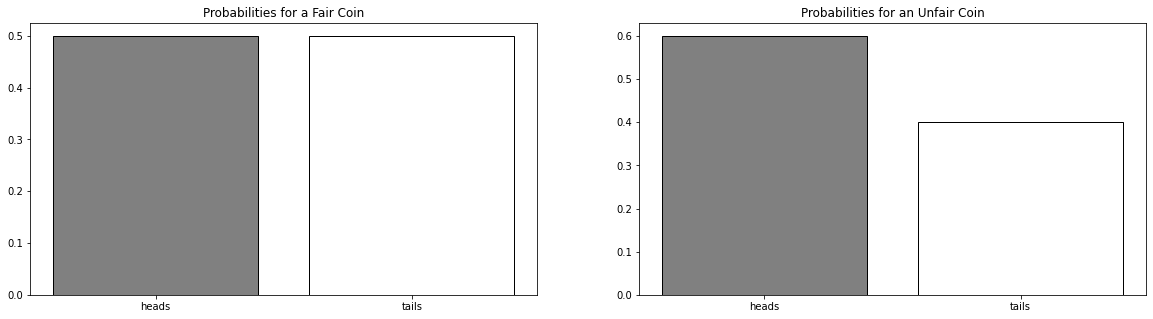

In [ ]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fair_coin = stats.bernoulli(.5).pmf([0, 1])
ax[0].bar(['heads', 'tails'], fair_coin, color=['gray', 'white'], edgecolor = 'black')
ax[0].set_title('Probabilities for a Fair Coin');

unfair_coin = stats.bernoulli(.4).pmf([0, 1])
ax[1].bar(['heads', 'tails'], unfair_coin, color = ['gray', 'white'], edgecolor = 'black')
ax[1].set_title('Probabilities for an Unfair Coin');

### Probability Mass Function

We can describe this kind of event as a function. Specifically, a situation in which there are two possible outcomes with a probability attached to each. This is called a *Bernoulli* distribution, and the functional form is:

$$f(k;p)=pk+(1-p)(1-k)\quad {\text{for }}k\in \{0,1\}$$

In our example of an unfair coin, if we consider heads as 0 and tails as 1 ($k$), we would have:

$$f(0, .4) = .4*0 + (1 - .4)(1 - 0)$$

Which equals 0.6. Similarly, the probability of a tails ($k = 0$):

$$f(1, .4) = .4 * 1 + (1 - 1)(1 - 1)$$

Which equals 0.4

In [ ]:
def bernoulli(k, p):
    return p*k + (1-p)*(1 - k)

In [ ]:
bernoulli(0, 0.4)

0.6

In [ ]:
bernoulli(1, 0.4)

0.4

### PROBLEMS

1. Suppose a bag contains 8 Red Marbles and 3 Blue Marbles.
 - What is the probability of choosing a red ball from a random draw?
 - And the probability of a blue ball?
2. Suppose a bag contains 4 Red Marbles, 7 Yellow Marbles, and 2 Blue Marbles.
 - What is the probability of selecting a red *or* yellow marble?
 - What is the probability of selecting a yellow *or* blue marble?
 - How many different combinations of two colors of marbles can be selected from the bag?
3. Suppose a bag contains 10 Red and 7 Blue marbles.
 - Suppose you select one marble from the bag, what is the probability this is red?
 - Suppose you select a blue marble, place the marble back in the bag, and select another marble. What is the probability the second marble is blue?
 - Suppose you select a blue marble, do not replace the marble and select another marble. What is the probability the second marble is blue?

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

"""
    Suppose a bag contains 8 Red Marbles and 3 Blue Marbles.

    What is the probability of choosing a red ball from a random draw?
    A Blue Ball?

    """

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
red_marble = stats.bernoulli(8 / 11).pmf([1, 0])
blue_marble = stats.bernoulli(3 / 11).pmf([1, 0])

ax[0].bar(["Red Marbles", "Not Red"], red_marble, color = ["red", "lightgray"], edgecolor = "black")
ax[0].set_title("Probabilities for a Red Marble")
ax[0].set_ylabel("Probability")

ax[1].bar(["Blue Marbles", "Not Blue"], blue_marble, color = ["blue", "lightgray"], edgecolor = "black")
ax[1].set_title("Probabilities for a Blue Marble")
ax[1].set_ylabel("Probability")

plt.show()

Ways to select two colors of marbles: 3


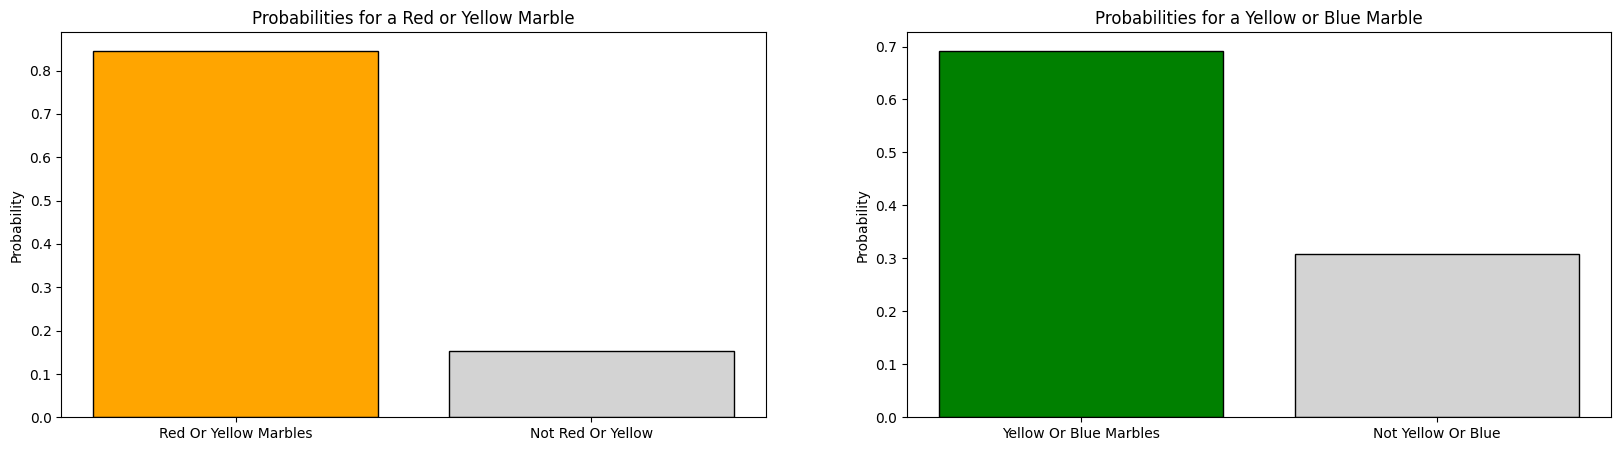

In [2]:
import scipy.stats as stats
from scipy.special import comb
import matplotlib.pyplot as plt

"""
Suppose a bag contain 4 Red Marbles, 7 Yellow Marbles, and 2 Blue Marbles.

- What is the probability of selecting a red _or_ yellow marble?
- What is the probability of selecting a yellow _or_ blue marble?
- How many ways can you select two colors of marbles from the bag?

"""

fig, ax = plt.subplots(1, 2, figsize = (20, 5))

red_or_yellow_marbles = stats.bernoulli((4 / 13) + (7 / 13)).pmf([1, 0])
yellow_or_blue_marbles = stats.bernoulli((7 / 13) + (2 / 13)).pmf([1, 0])


ax[0].bar(["Red Or Yellow Marbles", "Not Red Or Yellow"], red_or_yellow_marbles, color = ["orange", "lightgray"], edgecolor = "black")
ax[0].set_title("Probabilities for a Red or Yellow Marble")
ax[0].set_ylabel("Probability")

ax[1].bar(["Yellow Or Blue Marbles", "Not Yellow Or Blue"], yellow_or_blue_marbles, color = ["green", "lightgray"], edgecolor = "black")
ax[1].set_title("Probabilities for a Yellow or Blue Marble")
ax[1].set_ylabel("Probability")

print(f"Ways to select two colors of marbles: {comb(3, 2, exact = True)}")

plt.show()

In [1]:
import scipy.stats as stats

"""
Suppose a bag contains 10 Red and 7 Blue marbles.

1. What is the probability this is red?
2. What is the probability the second marble is blue if the first marble was blue (with replacement)?
3. What is the probability the second marble is blue if the first marble was blue (without replacement)?
"""

red_marble = 10 / 17

blue_marble_then_blue = (7 / 17) * (7 / 17)

blue_marble_no_replace = (7 / 17) * (6 / 16)

print(f"The probability that the marble is red is: {red_marble:.2f}")
print(f"The probability of drawing a blue marble twice (with replacement) is: {blue_marble_then_blue:.2f}")
print(f"The probability of drawing a blue marble twice (without replacement) is: {blue_marble_no_replace:.2f}")

The probability that the marble is red is: 0.59
The probability of drawing a blue marble twice (with replacement) is: 0.17
The probability of drawing a blue marble twice (without replacement) is: 0.15
